# Gagnavinnsla úr csv skrá

Skoðum hvernig við getum lesið inn .csv skrár með pandas. 
Kíkjum á gögn fyrir hlutabréf icelandair síðustu ár og hvernig við getum unnið með þau gögn.

Prófum svo að teikna smá með pakkanum matplotlib eftir það!

@author: helgi

### Innlestur á gögnum

In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# lesum skránna sótta af keldunni: https://www.keldan.is/market/shares/ICEAIR 
iceair_data = pd.read_csv("iceair_2019_04_06.csv")

# skoðum hvernig fyrstu línurnar í gögnunum líta út
print(iceair_data.head())

              DateTime  Icelandair Group Verð   Icelandair Group Magn
0  2014-04-04 18:00:00                   18.00                    NaN
1  2014-04-07 18:00:00                   17.75              6037329.0
2  2014-04-08 18:00:00                   17.90             27223237.0
3  2014-04-09 18:00:00                   18.15             36991954.0
4  2014-04-10 18:00:00                   17.95              2210500.0


Getum breytt gögnunum okkar aðeins eins og okkur hentar:

In [2]:
# breytum nöfnunum á dálkunum í eitthvað þægilegra
iceair_data.columns = ['DateTime', 'Verd', 'Magn']

# getum tekið út gildi sem vantar (NaN) með .dropna()
iceair_data = iceair_data.dropna()

# Tékkum núna hvernig gögnin líta út...
print(iceair_data.head())

              DateTime   Verd        Magn
1  2014-04-07 18:00:00  17.75   6037329.0
2  2014-04-08 18:00:00  17.90  27223237.0
3  2014-04-09 18:00:00  18.15  36991954.0
4  2014-04-10 18:00:00  17.95   2210500.0
5  2014-04-11 18:00:00  17.80   5307548.0


betra! 

Hvað meira er svo hægt að vita um gagnasettið okkar áður en við höldum áfram?

In [3]:
# Hvað er meira hægt að vita um gagnasafnið okkar?
print(iceair_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1245 entries, 1 to 1245
Data columns (total 3 columns):
DateTime    1245 non-null object
Verd        1245 non-null float64
Magn        1245 non-null float64
dtypes: float64(2), object(1)
memory usage: 38.9+ KB
None


Verð og magn tölur en DateTime er bara einhver hlutur! 

Breytum í dagsetningu

In [4]:
# Breytum datetime breytunni í date:
iceair_data['DateTime'] = pd.to_datetime(iceair_data['DateTime'])

# Tékkum núna hvernig gögnin líta út...
print(iceair_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1245 entries, 1 to 1245
Data columns (total 3 columns):
DateTime    1245 non-null datetime64[ns]
Verd        1245 non-null float64
Magn        1245 non-null float64
dtypes: datetime64[ns](1), float64(2)
memory usage: 38.9 KB
None


betra!

## Vísun í dálka

Ath að í kóðanum hér á undan var vísað í dálkinn DateTime með ritháttinum 
```python
iceair_data['DateTime'] 
```

En það eru aðrar leiðir til að vísa í dálkana okkar, t.d.
```python
print(iceair_data.DateTime)
print(iceair_data.loc[:,'DateTime'])
```

Bara velja það sem manni finnst þægilegast!

## Tölfræði

Nýtum það hvernig vísa megi í dálkana til að skoða smá tölfræði!

In [5]:
### Skoðum smá tölfræði

# Hvert er hæsta verðið sem icelandair hefur fengið?
print("Hæsta verð:" , max(iceair_data['Verd']))

# Hvað er meðal magnið yfir allt tímabilið?
print("Meðalmagn:", iceair_data['Magn'].mean())

# Hvað er mesta magnið yfir allt tímabilið?
print("Mesta magn:", max(iceair_data['Magn'])/1000000, "miljónir hluta .. (?)")

# Hvenær var það?
# Finnum fyrst hvar það er staðsett
indexOfHighest = np.argmax(iceair_data['Magn'])
dateOfHighest = iceair_data.loc[indexOfHighest,'DateTime']
print("Dagsetning mesta magns:", dateOfHighest)

Hæsta verð: 38.9
Meðalmagn: 17257673.41606426
Mesta magn: 158.662344 miljónir hluta .. (?)
Dagsetning mesta magns: 2018-08-13 18:00:00


# Gröf og Teikniskipanir

### Línurit

Skoðum hér hvernig hægt er að nota pakkann matplotlib til að teikna flottar myndir á einfaldan hátt

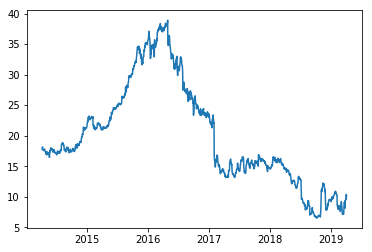

In [9]:
# Teiknum gengi Iceland Air síðustu 5 ár
plt.plot(iceair_data['DateTime'],iceair_data['Verd'])
plt.show()

Gerum hana fancy!

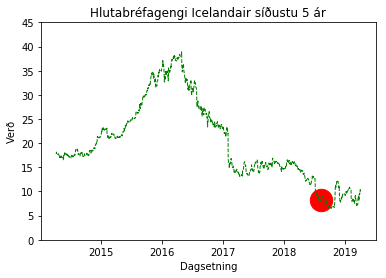

In [23]:
# Stillum lit og tegund línunar
plt.plot(
    iceair_data['DateTime'],
    iceair_data['Verd'], 
    color='green',
    linestyle='dashed',
    linewidth=1
)

# bætum við staðsetningunni þar sem mestu trade-in voru
plt.scatter(
    iceair_data['DateTime'][indexOfHighest], 
    iceair_data['Verd'][indexOfHighest],
    color='red',
    s=500
)

# fínpússum
plt.title('Hlutabréfagengi Icelandair síðustu 5 ár')
plt.xlabel('Dagsetning')
plt.ylabel('Verð')
plt.ylim([0,45])

plt.show()

### Tíðnirit

Getum líka skoðað aðrar tegundir af gröfum eins og t.d. tíðnirit.

Skoðum tíðnirrit fyrir magnið

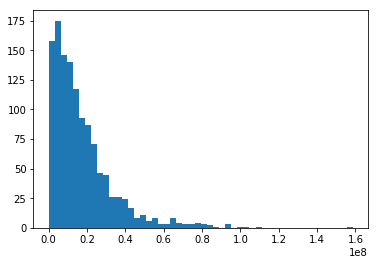

In [20]:
plt.hist(iceair_data['Magn'],bins=50)
plt.show()


Virðist vera rosa lognormaldreyft. 

Prófum tíðnirit fyrir sömu gögn eftir að hafa tekið logrann af þeim 

(pössum þá að hafa enga gagnapunkta sem eru undir 0!)

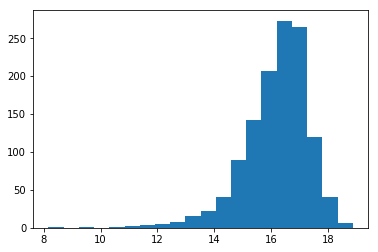

In [21]:
plt.hist(np.log(iceair_data['Magn'][iceair_data['Magn']>0]),bins=20)
plt.show()

snilld

### Subplot

Oft er vinsælt að teikna mörg gröf og grúbba þau saman. 

Við getum t.d. gert það með því að búa til heildarmyndina fyrst með skipuninni **figure()** og bætum svo gröfum við með skipuninni **subplot()**.

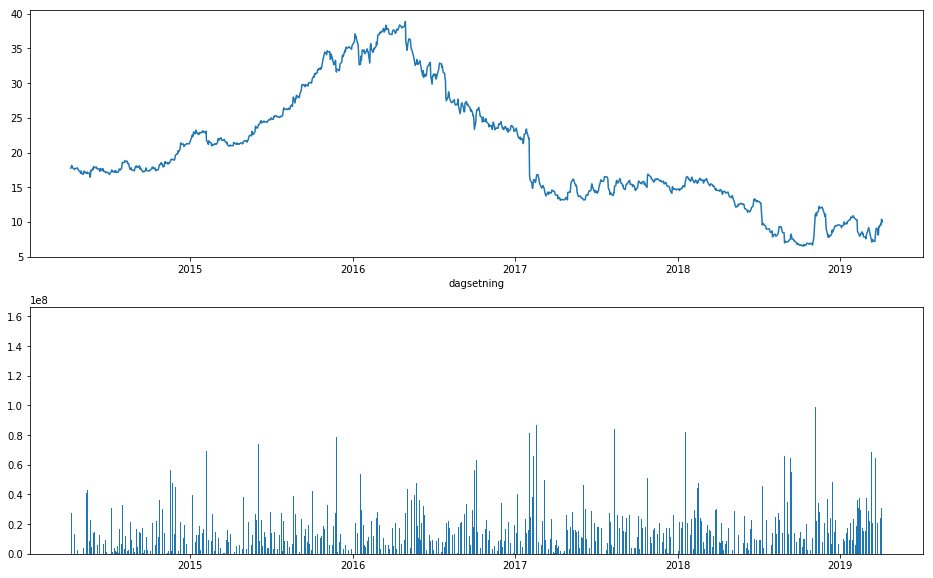

In [31]:
plt.figure(figsize=[16,10])

# hér setjum við inn tölurnar 2,1,1 af því við viljum búa til 2x1 grind af gröfum og þetta graf er númer 1
plt.subplot(211)
plt.plot(iceair_data['DateTime'], iceair_data['Verd'])
plt.xlabel('dagsetning')

# hér setjum við inn tölurnar 2,1,1 af því við viljum búa til 2x1 grind af gröfum og þetta graf er númer 2
plt.subplot(212)
plt.bar(iceair_data['DateTime'], iceair_data['Magn'])

plt.show()

# Pervert alert!  

# Gerum eitt mega-töff graf (sjá endanlega niðurstöðu neðst)

### *Margir* hápunktar í magni hlutabréfaviðskipta
Hægt er að fara í gegnum smá vesen til að finna 10 stærstu trade-dagana á iceair stockinu.
Þá er hægt að lita gagnapunktana eftir magni og hafa stærðina líka eftir magni!

In [48]:
X = 10

# Finnum þá X daga sem mesta magn verðbréfakaupa fór fram og teiknum þá á plottið
iceair_data_sortedByAmount = iceair_data.sort_values(by='Magn', ascending=False)
dataForAwesomePlot = pd.DataFrame({
    'DateTime' : list(iceair_data_sortedByAmount['DateTime'])[:X],
    'Verd' : list(iceair_data_sortedByAmount['Verd'])[:X],
    'Size': np.arange(550,50,-50),
    'Color' : np.arange(55, 5, -5)
})

# Hvernig lítur þetta út hjá okkur?
dataForAwesomePlot

,DateTime,Verd,Size,Color
0,2018-08-13 18:00:00,8.240,550,55
1,2018-11-09 18:00:00,11.400,500,50
2,2016-04-29 18:00:00,36.000,450,45
3,2018-11-06 18:00:00,10.890,400,40
4,2017-02-13 18:00:00,16.025,350,35
5,2016-02-09 18:00:00,35.150,300,30
6,2018-11-05 18:00:00,11.000,250,25
7,2017-02-17 18:00:00,16.800,200,20
8,2016-09-09 18:00:00,27.150,150,15
9,2017-08-11 18:00:00,15.150,100,10


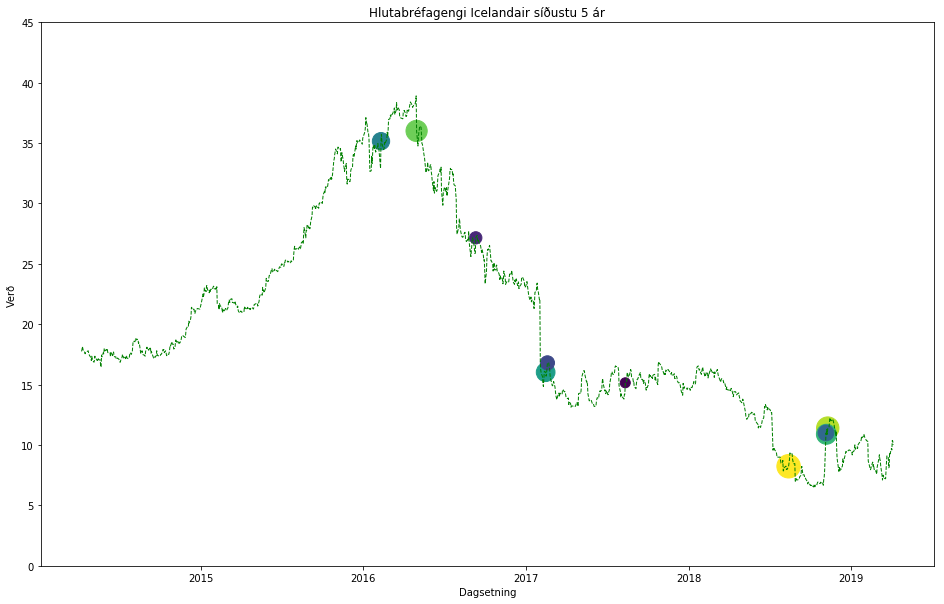

In [49]:
# Stillum lit og tegund línunar
plt.figure(figsize=[16,10])

# Teiknum línuritið
plt.plot(
    iceair_data['DateTime'],
    iceair_data['Verd'], 
    color='green',
    linestyle='dashed',
    linewidth=1
)

# bætum við staðsetningunni þar sem mestu trade-in voru
plt.scatter(
    dataForAwesomePlot['DateTime'], 
    dataForAwesomePlot['Verd'],
    s = dataForAwesomePlot['Size'],
    c = dataForAwesomePlot['Color'],
)

# Fínpússum
plt.title('Hlutabréfagengi Icelandair síðustu 5 ár')
plt.xlabel('Dagsetning')
plt.ylabel('Verð')
plt.ylim([0,45])
plt.show()

### Athyglisverðar dagsetningar

Finnum líka einhverjar athyglisverðar dagsetningar í sögu Icelandair og sjáum hvaða áhrif þær höfðu á hlutabréfaverðið þeirra. 

Merkjum þær inn með orðum og bókstöfum í viðeigandi litum.

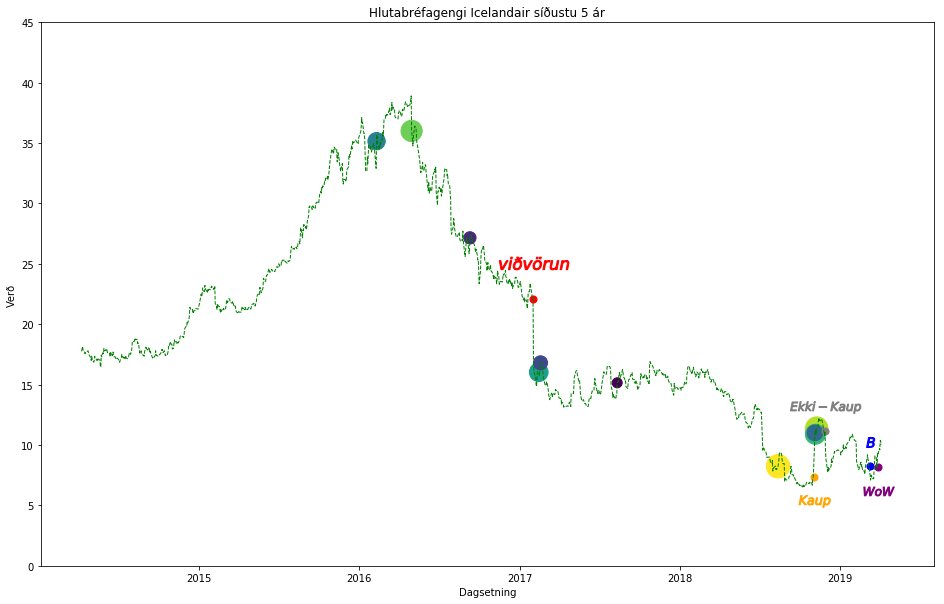

In [50]:
plt.figure(figsize=[16,10])

# Teiknum línuritið
plt.plot(
    iceair_data['DateTime'],
    iceair_data['Verd'], 
    color='green',
    linestyle='dashed',
    linewidth=1
)

# bætum við staðsetningunni þar sem mestu trade-in voru
plt.scatter(
    dataForAwesomePlot['DateTime'], 
    dataForAwesomePlot['Verd'],
    s = dataForAwesomePlot['Size'],
    c = dataForAwesomePlot['Color'],
)

# bætum við dagsetningu þar sem WOW fór á hausinn
wow_hrun_date = datetime.datetime(2019, 3, 28, 18, 0, 0)
plt.scatter(
    wow_hrun_date,
    iceair_data.loc[np.where(wow_hrun_date==iceair_data['DateTime'])[0],'Verd']-2,
    s = 1000,
    c = 'purple',
    marker = '$WoW$'
)
plt.scatter(
    wow_hrun_date,
    iceair_data.loc[np.where(wow_hrun_date==iceair_data['DateTime'])[0],'Verd'],
    s = 50,
    c = 'purple',
)

# bætum við dagsetningu dagsins eftir að seinni Boeng vél hrapaði
boeing_date = datetime.datetime(2019,3,11,18,0,0)
plt.scatter(
    boeing_date,
    iceair_data.loc[np.where(boeing_date==iceair_data['DateTime'])[0],'Verd']+2,
    s = 100,
    c = 'blue',
    marker = '$B$'
)
# bætum við dagsetningu dagsins eftir að seinni Boeng vél hrapaði
plt.scatter(
    boeing_date,
    iceair_data.loc[np.where(boeing_date==iceair_data['DateTime'])[0],'Verd'],
    s = 50,
    c = 'blue',
)

# 1. feb 2017 sendi Icelandair frá sér afkomuviðvörun
# Væntur árshagnaður átti að fara niður úr 25 mil.kr. í 17 mil.kr.
warning_date = datetime.datetime(2017,2,1,18,0,0)
plt.scatter(
    warning_date,
    iceair_data.loc[np.where(warning_date==iceair_data['DateTime'])[0],'Verd']+3,
    s = 5000,
    c = 'red',
    marker = '$viðvörun$'
)
plt.scatter(
    warning_date,
    iceair_data.loc[np.where(warning_date==iceair_data['DateTime'])[0],'Verd'],
    s = 50,
    c = 'red',
)

# Icelandair ætlar að kaupa wow (https://www.mbl.is/vidskipti/frettir/2018/11/05/icelandair_kaupir_wow_air/)
buying_wow_date = datetime.datetime(2018,11,2,18,0,0)
plt.scatter(
    buying_wow_date,
    iceair_data.loc[np.where(buying_wow_date==iceair_data['DateTime'])[0],'Verd']-2,
    s = 1000,
    c = 'orange',
    marker = '$Kaup$'
)
plt.scatter(
    buying_wow_date,
    iceair_data.loc[np.where(buying_wow_date==iceair_data['DateTime'])[0],'Verd'],
    s = 50,
    c = 'orange'
)

# hættu svo við https://www.mannlif.is/heimurinn/innlent/icelandair-kaupir-ekki-wow/
not_buying_wow_date = datetime.datetime(2018,11,29,18,0,0)
plt.scatter(
    not_buying_wow_date,
    iceair_data.loc[np.where(not_buying_wow_date==iceair_data['DateTime'])[0],'Verd']+2,
    s = 5000,
    c = 'grey',
    marker = '$Ekki-Kaup$'
)
plt.scatter(
    not_buying_wow_date,
    iceair_data.loc[np.where(not_buying_wow_date==iceair_data['DateTime'])[0],'Verd'],
    s = 50,
    c = 'grey'
)


# Fínpússum
plt.title('Hlutabréfagengi Icelandair síðustu 5 ár')
plt.xlabel('Dagsetning')
plt.ylabel('Verð')
plt.ylim([0,45])
plt.show()


Á grafinu hér að ofan er þá 
- **viðvörun** þar sem gefin var út viðvörun við afkomuspá fyrirtækisins
- **Kaup** þar sem Icelandair sagðist ætla að kaupa WOW
- **Ekki - Kaup** þar sem tilkynnt var að hætt væri við kaup fyrirtækisins á WOW
- **B** þar sem seinni Boeing vélin hrapaði
- **WOW** þar sem WOW fór officially á hausinn

### Interactive Slider

Síðast en ekki síst, bætum við interactive slider sem afmarkar hvar grafið okkar byrjar.
Til að gera það, þurfum við í raun bara að gera þrennt:

- importa pakkanum efst
- framkalla sliderinn neðst
- passa að hafa hitt allt saman inni í falli til að getað kallað í það í hvert skipti sem sliderinn er hreyfður!
    - ath hvernig inntakið *yearFrom* er notað til að stilla xlim eiginleika grafsins neðst í fallinu

In [51]:
# Bætum við slider
from IPython.html.widgets import *

def plotWithSlider(yearFrom):
    # Stillum lit og tegund línunar
    plt.figure(figsize=[16,10])

    # Teiknum línuritið
    plt.plot(
        iceair_data['DateTime'],
        iceair_data['Verd'], 
        color='green',
        linestyle='dashed',
        linewidth=1
    )

    # bætum við staðsetningunni þar sem mestu trade-in voru
    plt.scatter(
        dataForAwesomePlot['DateTime'], 
        dataForAwesomePlot['Verd'],
        s = dataForAwesomePlot['Size'],
        c = dataForAwesomePlot['Color'],
    )

    # bætum við dagsetningu þar sem WOW fór á hausinn
    wow_hrun_date = datetime.datetime(2019, 3, 28, 18, 0, 0)
    plt.scatter(
        wow_hrun_date,
        iceair_data.loc[np.where(wow_hrun_date==iceair_data['DateTime'])[0],'Verd']-2,
        s = 1000,
        c = 'purple',
        marker = '$WoW$'
    )
    plt.scatter(
        wow_hrun_date,
        iceair_data.loc[np.where(wow_hrun_date==iceair_data['DateTime'])[0],'Verd'],
        s = 50,
        c = 'purple',
    )

    # bætum við dagsetningu dagsins eftir að seinni Boeng vél hrapaði
    boeing_date = datetime.datetime(2019,3,11,18,0,0)
    plt.scatter(
        boeing_date,
        iceair_data.loc[np.where(boeing_date==iceair_data['DateTime'])[0],'Verd']+2,
        s = 100,
        c = 'blue',
        marker = '$B$'
    )
    # bætum við dagsetningu dagsins eftir að seinni Boeng vél hrapaði
    plt.scatter(
        boeing_date,
        iceair_data.loc[np.where(boeing_date==iceair_data['DateTime'])[0],'Verd'],
        s = 50,
        c = 'blue',
    )

    # 1. feb 2017 sendi Icelandair frá sér afkomuviðvörun
    # Væntur árshagnaður átti að fara niður úr 25 mil.kr. í 17 mil.kr.
    warning_date = datetime.datetime(2017,2,1,18,0,0)
    plt.scatter(
        warning_date,
        iceair_data.loc[np.where(warning_date==iceair_data['DateTime'])[0],'Verd']+3,
        s = 5000,
        c = 'red',
        marker = '$viðvörun$'
    )
    plt.scatter(
        warning_date,
        iceair_data.loc[np.where(warning_date==iceair_data['DateTime'])[0],'Verd'],
        s = 50,
        c = 'red',
    )

    # Icelandair ætlar að kaupa wow (https://www.mbl.is/vidskipti/frettir/2018/11/05/icelandair_kaupir_wow_air/)
    buying_wow_date = datetime.datetime(2018,11,2,18,0,0)
    plt.scatter(
        buying_wow_date,
        iceair_data.loc[np.where(buying_wow_date==iceair_data['DateTime'])[0],'Verd']-2,
        s = 1000,
        c = 'orange',
        marker = '$Kaup$'
    )
    plt.scatter(
        buying_wow_date,
        iceair_data.loc[np.where(buying_wow_date==iceair_data['DateTime'])[0],'Verd'],
        s = 50,
        c = 'orange'
    )

    # hættu svo við https://www.mannlif.is/heimurinn/innlent/icelandair-kaupir-ekki-wow/
    not_buying_wow_date = datetime.datetime(2018,11,29,18,0,0)
    plt.scatter(
        not_buying_wow_date,
        iceair_data.loc[np.where(not_buying_wow_date==iceair_data['DateTime'])[0],'Verd']+2,
        s = 5000,
        c = 'grey',
        marker = '$Ekki-Kaup$'
    )
    plt.scatter(
        not_buying_wow_date,
        iceair_data.loc[np.where(not_buying_wow_date==iceair_data['DateTime'])[0],'Verd'],
        s = 50,
        c = 'grey'
    )


    # Fínpússum
    plt.title('Hlutabréfagengi Icelandair síðustu 5 ár')
    plt.xlabel('Dagsetning')
    plt.ylabel('Verð')
    plt.ylim([0,45])
    plt.xlim([datetime.datetime(yearFrom,1,1,18,0,0)],[datetime.datetime(2019,5,10,18,0,0)])
    plt.show()


    
interact(plotWithSlider, yearFrom=widgets.IntSlider(min=2014,max=2019,step=1,value=2014,description='Ár Frá:'));


interactive(children=(IntSlider(value=2014, description='Ár Frá:', max=2019, min=2014), Output()), _dom_classe…